# Hockey Stats Web Scraping

Below I am practicing building a web scraper to obtain hockey stats about a certain NHL player, Sidney Crosby of the Pittsburgh Penguins. I am obtaining the data from https://www.hockey-reference.com/players/c/crosbsi01.html#stats_basic_plus_nhl::25

Please note that if you visit the hyperlink above, there is an option to conveniently export all of the data from the tables and such into a nice Excel table for use. I could have easily used that option to obtain the data, but I decided to go the slightly harder route to try to use some of my web scraping skills.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
url = 'https://www.hockey-reference.com/players/c/crosbsi01.html#stats_basic_plus_nhl::25'
webpage = requests.get(url)

In [3]:
soup = BeautifulSoup(webpage.text, 'html.parser')

In [4]:
table = soup.find_all('tr')

In [5]:
years = list(range(2006, 2022))

In [6]:
string_to_prepend = 'stats_basic_plus_nhl.'
data = []
for num in years:
    num_str = str(num)
    temp = string_to_prepend + num_str
    data_found = soup.find(attrs={'id' : temp})
    data.append(data_found)

In [7]:
seasons = []
ages = []
games_played = []
goals = []
assists = []
points = []
plus_minus = []
pen_min = []
goals_ev = []
goals_pp = []
goals_sh = []
goals_gw = []
assists_ev = []
assists_pp = []
assists_sh = []
shots = []
shot_pct = []
shots_attempted = []
time_on_ice = []
faceoff_wins = []
faceoff_losses = []
faceoff_percentage = []
blocks = []
hits = []
takeaways = []
giveaways = []

for year in data:
    seasons.append(year.find(attrs={'data-stat':'season'}).text)
    ages.append(year.find(attrs={'data-stat':'age'}).text)
    games_played.append(year.find(attrs={'data-stat':'games_played'}).text)
    goals.append(year.find(attrs={'data-stat':'goals'}).text)
    assists.append(year.find(attrs={'data-stat':'assists'}).text)
    points.append(year.find(attrs={'data-stat':'points'}).text)
    plus_minus.append(year.find(attrs={'data-stat':'plus_minus'}).text)
    pen_min.append(year.find(attrs={'data-stat':'pen_min'}).text)
    goals_ev.append(year.find(attrs={'data-stat':'goals_ev'}).text)
    goals_pp.append(year.find(attrs={'data-stat':'goals_pp'}).text)
    goals_sh.append(year.find(attrs={'data-stat':'goals_sh'}).text)
    goals_gw.append(year.find(attrs={'data-stat':'goals_gw'}).text)
    assists_ev.append(year.find(attrs={'data-stat':'assists_ev'}).text)
    assists_pp.append(year.find(attrs={'data-stat':'assists_pp'}).text)
    assists_sh.append(year.find(attrs={'data-stat':'assists_sh'}).text)
    shots.append(year.find(attrs={'data-stat':'shots'}).text)
    shot_pct.append(year.find(attrs={'data-stat':'shot_pct'}).text)
    shots_attempted.append(year.find(attrs={'data-stat':'shots_attempted'}).text)
    time_on_ice.append(year.find(attrs={'data-stat':'time_on_ice'}).text)
    faceoff_wins.append(year.find(attrs={'data-stat':'faceoff_wins'}).text)
    faceoff_losses.append(year.find(attrs={'data-stat':'faceoff_losses'}).text)
    faceoff_percentage.append(year.find(attrs={'data-stat':'faceoff_percentage'}).text)
    blocks.append(year.find(attrs={'data-stat':'blocks'}).text)
    hits.append(year.find(attrs={'data-stat':'hits'}).text)
    takeaways.append(year.find(attrs={'data-stat':'takeaways'}).text)
    giveaways.append(year.find(attrs={'data-stat':'giveaways'}).text)

print(giveaways)

['', '', '37', '80', '77', '29', '15', '28', '56', '53', '47', '70', '76', '67', '25', '54']


In [8]:
#Create a pandas DataFrame
zippedList = list(zip(seasons, ages, games_played, goals, assists, points, plus_minus, pen_min, goals_ev, goals_pp, goals_sh, goals_gw, assists_ev, assists_pp, assists_sh, shots, shot_pct, shots_attempted, time_on_ice, faceoff_wins, faceoff_losses, faceoff_percentage, blocks, hits, takeaways, giveaways))
df = pd.DataFrame(zippedList, columns = ['Season', 'Age', 'Games Played', 'Goals', 'Assists', 'Points', 'Plus/Minus', 'Penalty Minutes', 'Even Goals', 'Power Play Goals', 'Short-handed Goals', 'Game-winning Goals', 'Even Assists', 'Power Play Assists', 'Short-Handed Assists', 'Shots', 'Shot Percentage', 'Shot Attempts', 'Time on Ice', 'Faceoff Wins', 'Faceoff Losses', 'Faceoff Percentage', 'Blocks', 'Hits', 'Takeaways', 'Giveaways'])
print(df.head())

    Season Age Games Played Goals Assists Points Plus/Minus Penalty Minutes  \
0  2005-06  18           81    39      63    102         -1             110   
1  2006-07  19           79    36      84    120         10              60   
2  2007-08  20           53    24      48     72         18              39   
3  2008-09  21           77    33      70    103          3              76   
4  2009-10  22           81    51      58    109         15              71   

  Even Goals Power Play Goals  ... Shot Percentage Shot Attempts Time on Ice  \
0         23               16  ...            14.0                      1630   
1         23               13  ...            14.4                      1640   
2         18                6  ...            13.9           280        1105   
3         26                7  ...            13.9           388        1690   
4         36               13  ...            17.1           497        1778   

  Faceoff Wins Faceoff Losses Faceoff Percen

In [9]:
cols = [i for i in df.columns if i not in ['Season']]
for col in cols:
    df[col] = pd.to_numeric(df[col])
df.dtypes

Season                   object
Age                       int64
Games Played              int64
Goals                     int64
Assists                   int64
Points                    int64
Plus/Minus                int64
Penalty Minutes           int64
Even Goals                int64
Power Play Goals          int64
Short-handed Goals        int64
Game-winning Goals        int64
Even Assists              int64
Power Play Assists        int64
Short-Handed Assists      int64
Shots                     int64
Shot Percentage         float64
Shot Attempts           float64
Time on Ice               int64
Faceoff Wins            float64
Faceoff Losses          float64
Faceoff Percentage      float64
Blocks                  float64
Hits                    float64
Takeaways               float64
Giveaways               float64
dtype: object

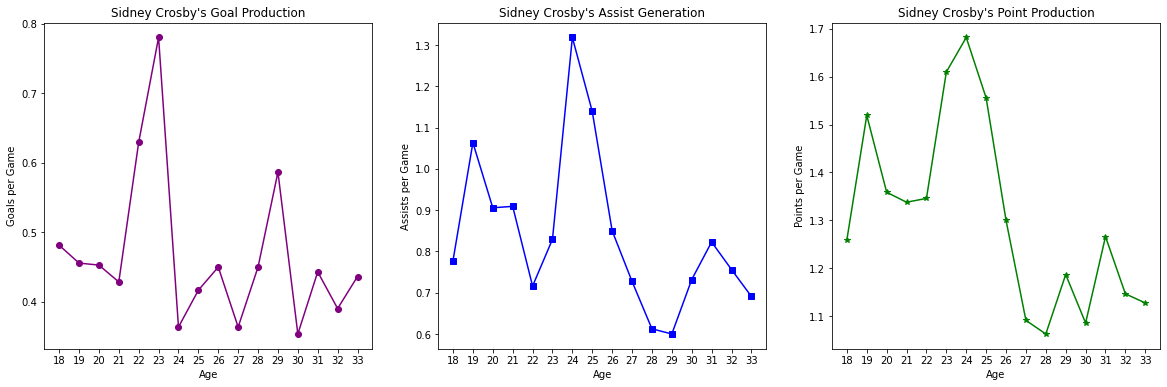

In [10]:
plt.figure(figsize=(20,6))
ax = plt.subplot(1, 3, 1)
plt.plot(df.Age, df.Goals/df['Games Played'], color='purple', marker='o', label='Goals per Game')
ax.set_xticks(df.Age)
plt.xlabel('Age')
plt.ylabel('Goals per Game')
plt.title('Sidney Crosby\'s Goal Production')

ax2 = plt.subplot(1,3,2)
plt.plot(df.Age, df.Assists/df['Games Played'], color='blue', marker='s', label='Assists per Game')
ax2.set_xticks(df.Age)
plt.xlabel('Age')
plt.ylabel('Assists per Game')
plt.title('Sidney Crosby\'s Assist Generation')

ax3 = plt.subplot(1,3,3)
plt.plot(df.Age, df.Points/df['Games Played'], color='green', marker='*', label='Points per Game')
ax3.set_xticks(df.Age)
plt.xlabel('Age')
plt.ylabel('Points per Game')
plt.title('Sidney Crosby\'s Point Production')
plt.show()

In [11]:
df.describe()

,Age,Games Played,Goals,Assists,Points,Plus/Minus,Penalty Minutes,Even Goals,Power Play Goals,Short-handed Goals,...,Shot Percentage,Shot Attempts,Time on Ice,Faceoff Wins,Faceoff Losses,Faceoff Percentage,Blocks,Hits,Takeaways,Giveaways
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.0000,16.000000,16.000000,16.000000,16.00000,...,16.000000,14.000000,16.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,25.500000,64.937500,30.375000,52.437500,82.812500,11.4375,43.687500,21.062500,9.062500,0.25000,...,14.431250,328.857143,1352.562500,745.571429,668.571429,52.792857,29.642857,55.000000,36.000000,51.000000
std,4.760952,20.193955,11.086779,15.688504,23.950557,9.3735,25.679353,7.298116,4.170831,0.57735,...,2.348253,113.055369,432.442053,254.445918,236.091480,2.424067,10.831628,25.648512,14.528487,21.472702
min,18.000000,22.000000,8.000000,29.000000,37.000000,-8.0000,14.000000,6.000000,2.000000,0.00000,...,10.700000,126.000000,406.000000,227.000000,226.000000,48.200000,7.000000,11.000000,10.000000,15.000000
25%,21.750000,50.000000,24.000000,40.250000,65.000000,4.5000,25.500000,18.000000,5.750000,0.00000,...,13.450000,257.750000,1053.500000,551.250000,460.250000,51.325000,24.000000,34.250000,28.250000,31.000000
50%,25.500000,77.000000,32.500000,52.500000,87.000000,15.0000,40.500000,22.000000,10.000000,0.00000,...,14.200000,364.000000,1584.000000,813.000000,783.500000,52.750000,28.500000,56.000000,39.500000,53.500000
75%,29.250000,80.000000,36.000000,63.500000,102.250000,18.0000,50.250000,25.250000,12.250000,0.00000,...,15.300000,411.750000,1666.000000,989.750000,875.500000,55.125000,39.000000,78.750000,42.750000,69.250000
max,33.000000,82.000000,51.000000,84.000000,120.000000,26.0000,110.000000,36.000000,16.000000,2.00000,...,19.900000,497.000000,1778.000000,1026.000000,921.000000,56.000000,43.000000,90.000000,56.000000,80.000000


[0.05157396] 13.055501456269113


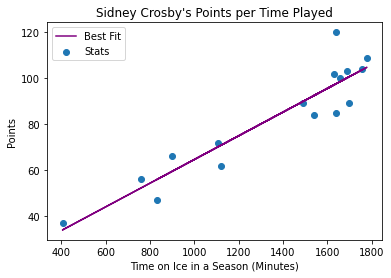

In [12]:
#There should be a positive correlation between time on ice and the amount of points a player scores
#As long as they stay consistent, that is...
#Let's just do a simple linear regression on this for praccy
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = df['Time on Ice'].values.reshape(-1,1)
y = df['Points']
lr.fit(X, y)
y_pred = lr.predict(X)
print(lr.coef_, lr.intercept_)

plt.scatter(X, y, label='Stats')
plt.plot(X, y_pred, color='purple', label='Best Fit')
plt.legend()
plt.ylabel('Points')
plt.xlabel('Time on Ice in a Season (Minutes)')
plt.title('Sidney Crosby\'s Points per Time Played')
plt.show()

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Games Played', ylabel='Age'>,
        <AxesSubplot:xlabel='Points', ylabel='Age'>,
        <AxesSubplot:xlabel='Plus/Minus', ylabel='Age'>,
        <AxesSubplot:xlabel='Shots', ylabel='Age'>,
        <AxesSubplot:xlabel='Shot Percentage', ylabel='Age'>,
        <AxesSubplot:xlabel='Shot Attempts', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Games Played'>,
        <AxesSubplot:xlabel='Games Played', ylabel='Games Played'>,
        <AxesSubplot:xlabel='Points', ylabel='Games Played'>,
        <AxesSubplot:xlabel='Plus/Minus', ylabel='Games Played'>,
        <AxesSubplot:xlabel='Shots', ylabel='Games Played'>,
        <AxesSubplot:xlabel='Shot Percentage', ylabel='Games Played'>,
        <AxesSubplot:xlabel='Shot Attempts', ylabel='Games Played'>],
       [<AxesSubplot:xlabel='Age', ylabel='Points'>,
        <AxesSubplot:xlabel='Games Played', ylabel='Points'>,
        <AxesSubplot:xlabel='Point

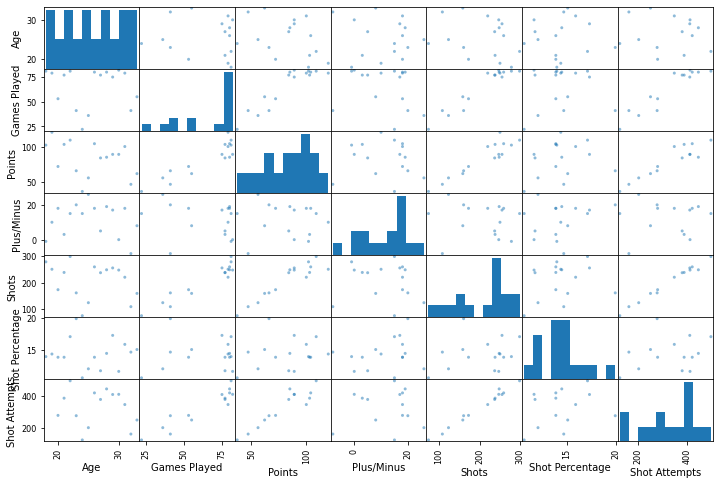

In [14]:
#I dont know, let's check to see what other variables in our df are correlated, strongly or loosely
from pandas.plotting import scatter_matrix

attributes = ['Age', 'Games Played', 'Points', 'Plus/Minus', 'Shots', 'Shot Percentage', 'Shot Attempts']
scatter_matrix(df[attributes], figsize=(12,8))

So the scatter matrix didn't tell us anything groundbreaking (shocker, who would have guessed that shots would be positively correlated with games played).

The good news is that now that we've done this process it is easily repeatable for another player without having to do too much work. For example, let's do the same but with Alex Ovechkin, Sidney Crosby's biggest rival.

In [15]:
#Get url permissions to access the data
url = 'https://www.hockey-reference.com/players/o/ovechal01.html#stats_basic_plus_nhl'
webpage = requests.get(url)

#turn our webpage into a BeautifulSoup object
soup = BeautifulSoup(webpage.text, 'html.parser')

#Do the process of extracting the data
table = soup.find_all('tr')
years = list(range(2006, 2022)) #Ovechkin was active the same years as Crosby was, but putting this here for visibility
string_to_prepend = 'stats_basic_plus_nhl.'
data = []
for num in years:
    num_str = str(num)
    temp = string_to_prepend + num_str
    data_found = soup.find(attrs={'id' : temp})
    data.append(data_found)

seasons = []
ages = []
games_played = []
goals = []
assists = []
points = []
plus_minus = []
pen_min = []
goals_ev = []
goals_pp = []
goals_sh = []
goals_gw = []
assists_ev = []
assists_pp = []
assists_sh = []
shots = []
shot_pct = []
shots_attempted = []
time_on_ice = []
faceoff_wins = []
faceoff_losses = []
faceoff_percentage = []
blocks = []
hits = []
takeaways = []
giveaways = []

for year in data:
    seasons.append(year.find(attrs={'data-stat':'season'}).text)
    ages.append(year.find(attrs={'data-stat':'age'}).text)
    games_played.append(year.find(attrs={'data-stat':'games_played'}).text)
    goals.append(year.find(attrs={'data-stat':'goals'}).text)
    assists.append(year.find(attrs={'data-stat':'assists'}).text)
    points.append(year.find(attrs={'data-stat':'points'}).text)
    plus_minus.append(year.find(attrs={'data-stat':'plus_minus'}).text)
    pen_min.append(year.find(attrs={'data-stat':'pen_min'}).text)
    goals_ev.append(year.find(attrs={'data-stat':'goals_ev'}).text)
    goals_pp.append(year.find(attrs={'data-stat':'goals_pp'}).text)
    goals_sh.append(year.find(attrs={'data-stat':'goals_sh'}).text)
    goals_gw.append(year.find(attrs={'data-stat':'goals_gw'}).text)
    assists_ev.append(year.find(attrs={'data-stat':'assists_ev'}).text)
    assists_pp.append(year.find(attrs={'data-stat':'assists_pp'}).text)
    assists_sh.append(year.find(attrs={'data-stat':'assists_sh'}).text)
    shots.append(year.find(attrs={'data-stat':'shots'}).text)
    shot_pct.append(year.find(attrs={'data-stat':'shot_pct'}).text)
    shots_attempted.append(year.find(attrs={'data-stat':'shots_attempted'}).text)
    time_on_ice.append(year.find(attrs={'data-stat':'time_on_ice'}).text)
    faceoff_wins.append(year.find(attrs={'data-stat':'faceoff_wins'}).text)
    faceoff_losses.append(year.find(attrs={'data-stat':'faceoff_losses'}).text)
    faceoff_percentage.append(year.find(attrs={'data-stat':'faceoff_percentage'}).text)
    blocks.append(year.find(attrs={'data-stat':'blocks'}).text)
    hits.append(year.find(attrs={'data-stat':'hits'}).text)
    takeaways.append(year.find(attrs={'data-stat':'takeaways'}).text)
    giveaways.append(year.find(attrs={'data-stat':'giveaways'}).text)

#Create a pandas DataFrame
zippedList = list(zip(seasons, ages, games_played, goals, assists, points, plus_minus, pen_min, goals_ev, goals_pp, goals_sh, goals_gw, assists_ev, assists_pp, assists_sh, shots, shot_pct, shots_attempted, time_on_ice, faceoff_wins, faceoff_losses, faceoff_percentage, blocks, hits, takeaways, giveaways))
df1 = pd.DataFrame(zippedList, columns = ['Season', 'Age', 'Games Played', 'Goals', 'Assists', 'Points', 'Plus/Minus', 'Penalty Minutes', 'Even Goals', 'Power Play Goals', 'Short-handed Goals', 'Game-winning Goals', 'Even Assists', 'Power Play Assists', 'Short-Handed Assists', 'Shots', 'Shot Percentage', 'Shot Attempts', 'Time on Ice', 'Faceoff Wins', 'Faceoff Losses', 'Faceoff Percentage', 'Blocks', 'Hits', 'Takeaways', 'Giveaways'])
print(df1.head())

#Convert numeric datatypes to numeric
cols = [i for i in df1.columns if i not in ['Season']]
for col in cols:
    df1[col] = pd.to_numeric(df1[col])

    Season Age Games Played Goals Assists Points Plus/Minus Penalty Minutes  \
0  2005-06  20           81    52      54    106          2              52   
1  2006-07  21           82    46      46     92        -19              52   
2  2007-08  22           82    65      47    112         28              40   
3  2008-09  23           79    56      54    110          8              72   
4  2009-10  24           72    50      59    109         45              89   

  Even Goals Power Play Goals  ... Shot Percentage Shot Attempts Time on Ice  \
0         28               21  ...            12.2                      1751   
1         30               16  ...            11.7                      1754   
2         43               22  ...            14.6           772        1894   
3         36               19  ...            10.6           875        1817   
4         37               13  ...            13.6           665        1569   

  Faceoff Wins Faceoff Losses Faceoff Percen

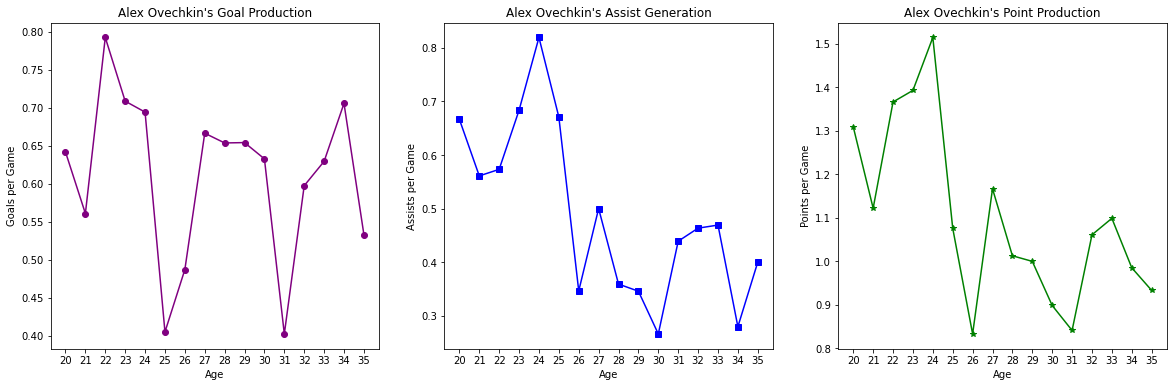

In [16]:
#We can make plots of point production similar to what we did for Crosby
plt.figure(figsize=(20,6))
ax = plt.subplot(1, 3, 1)
plt.plot(df1.Age, df1.Goals/df1['Games Played'], color='purple', marker='o', label='Goals per Game')
ax.set_xticks(df1.Age)
plt.xlabel('Age')
plt.ylabel('Goals per Game')
plt.title('Alex Ovechkin\'s Goal Production')

ax2 = plt.subplot(1,3,2)
plt.plot(df1.Age, df1.Assists/df1['Games Played'], color='blue', marker='s', label='Assists per Game')
ax2.set_xticks(df1.Age)
plt.xlabel('Age')
plt.ylabel('Assists per Game')
plt.title('Alex Ovechkin\'s Assist Generation')

ax3 = plt.subplot(1,3,3)
plt.plot(df1.Age, df1.Points/df1['Games Played'], color='green', marker='*', label='Points per Game')
ax3.set_xticks(df1.Age)
plt.xlabel('Age')
plt.ylabel('Points per Game')
plt.title('Alex Ovechkin\'s Point Production')
plt.show()

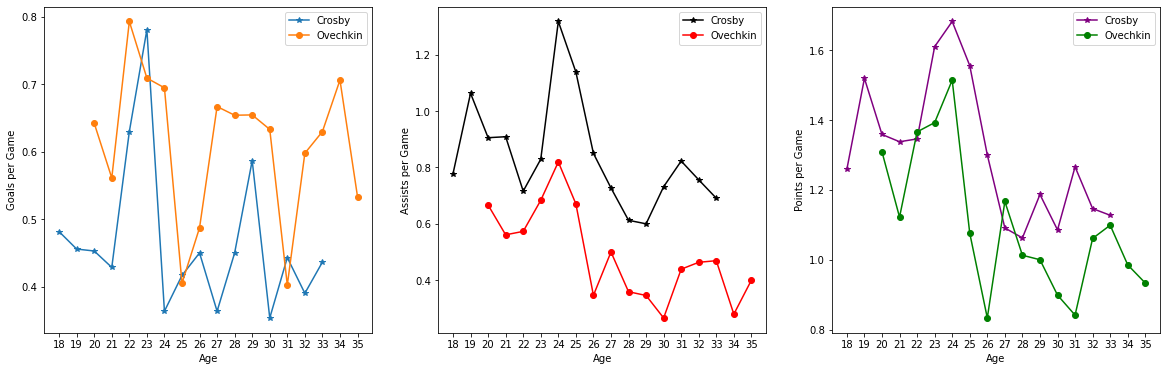

In [17]:
#Compare Crosby and Ovechkin to see who was the better point producer at which age
xticks = np.union1d(df.Age, df1.Age)

plt.figure(figsize=(20,6))
ax = plt.subplot(1, 3, 1)
plt.plot(df.Age, df.Goals/df['Games Played'], marker='*', label='Crosby')
plt.plot(df1.Age, df1.Goals/df1['Games Played'], marker='o', label='Ovechkin')
ax.set_xticks(xticks)
plt.xlabel('Age')
plt.ylabel('Goals per Game')
plt.legend()

ax2 = plt.subplot(1,3,2)
plt.plot(df.Age, df.Assists/df['Games Played'], marker='*', color='black', label='Crosby')
plt.plot(df1.Age, df1.Assists/df1['Games Played'], marker='o', color='red', label='Ovechkin')
ax2.set_xticks(xticks)
plt.xlabel('Age')
plt.ylabel('Assists per Game')
plt.legend()

ax3 = plt.subplot(1,3,3)
plt.plot(df.Age, df.Points/df['Games Played'], marker='*', color='purple', label='Crosby')
plt.plot(df1.Age, df1.Points/df1['Games Played'], marker='o', color='green', label='Ovechkin')
ax3.set_xticks(xticks)
plt.xlabel('Age')
plt.ylabel('Points per Game')
plt.legend()
plt.show()

So it appears that Crosby has the upper hand in assists and production of points most of the time, whereas Ovechkin has always been more of a goal-scorer rather than a play-maker.

The only problem with these plots is that the datapoints that occur at the same ages dont occur at the same point in time, due to the age difference between Crosby and Ovechkin. To remedy this we could simply plot these values against the season.

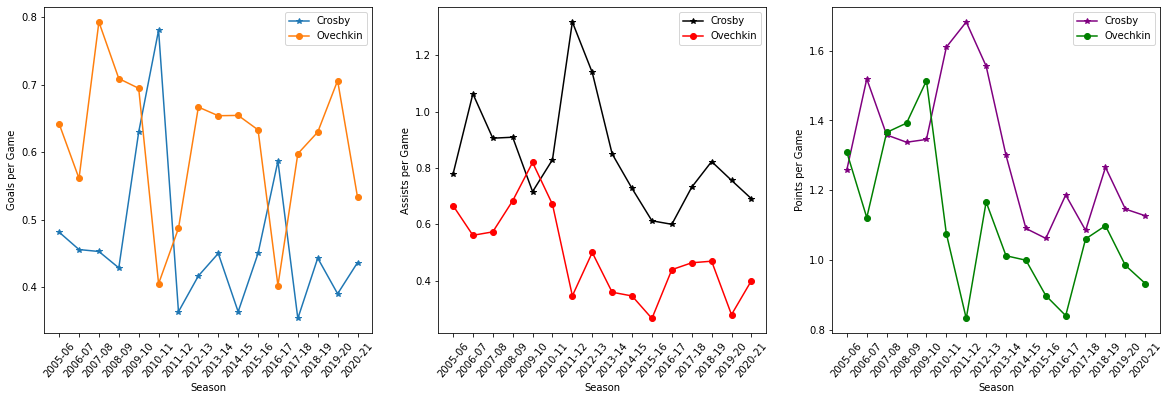

In [18]:
xticks = range(len(df))

plt.figure(figsize=(20,6))
ax = plt.subplot(1, 3, 1)
plt.plot(xticks, df.Goals/df['Games Played'], marker='*', label='Crosby')
plt.plot(xticks, df1.Goals/df1['Games Played'], marker='o', label='Ovechkin')
ax.set_xticks(xticks)
ax.set_xticklabels(df.Season, rotation=50)
plt.xlabel('Season')
plt.ylabel('Goals per Game')
plt.legend()

ax2 = plt.subplot(1,3,2)
plt.plot(xticks, df.Assists/df['Games Played'], marker='*', color='black', label='Crosby')
plt.plot(xticks, df1.Assists/df1['Games Played'], marker='o', color='red', label='Ovechkin')
ax2.set_xticks(xticks)
ax2.set_xticklabels(df.Season, rotation=50)
plt.xlabel('Season')
plt.ylabel('Assists per Game')
plt.legend()

ax3 = plt.subplot(1,3,3)
plt.plot(xticks, df.Points/df['Games Played'], marker='*', color='purple', label='Crosby')
plt.plot(xticks, df1.Points/df1['Games Played'], marker='o', color='green', label='Ovechkin')
ax3.set_xticks(xticks)
ax3.set_xticklabels(df.Season, rotation=50)
plt.xlabel('Season')
plt.ylabel('Points per Game')
plt.legend()
plt.show()

We come to a similar conclusion as we did with the previous plots, but at least the datapoints line up correctly.